In [1]:
import random
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

plt.style.use(['ggplot'])

color_lst = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 
'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 
'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkkhaki', 
'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 
'darkslategray', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dodgerblue', 'firebrick', 
'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 
'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 
'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 
'lightseagreen', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 
'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 
'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 
'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'palevioletred', 
'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 
'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'snow', 'springgreen', 
'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'white', 'whitesmoke', 'yellow', 'yellowgreen']

In [2]:
df = pd.read_excel('percent_stack_chart.xlsx')
df.head()

,name,cate,grade
0,조*현,식품,vvip
1,유*선,식품,vvip
2,유*선,식품,vvip
3,이*희,식품,vvip
4,양*진,식품,vvip


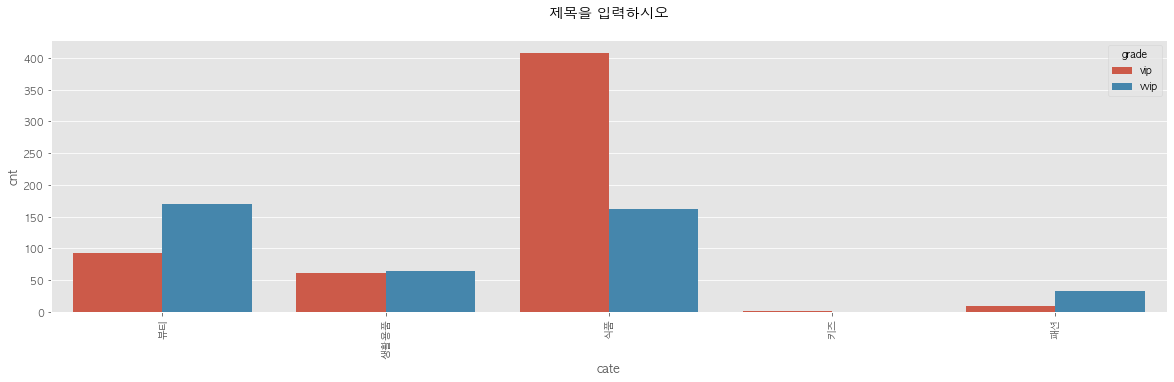

In [4]:
_z = df.groupby(['grade','cate']).size().reset_index(name = 'cnt')

plt.figure(figsize = (20,5))
sns.barplot(data = _z, x = 'cate', y= 'cnt', hue = 'grade')
plt.xticks(rotation = 90)
plt.title('제목을 입력하시오\n')
plt.show()

In [11]:
x = []
for j in df['cate'].unique():
    z = df[df['cate'] == j].groupby('grade').size().reset_index(name = 'cnt')
    z = z.sort_values(by = 'cnt', ascending = False)
    z['pnt(%)'] = [round(x,3) for x in z['cnt'] / z['cnt'].sum() * 100]
    z['cate'] = j
    x.append(z)
grade_cate_df = pd.concat(x)

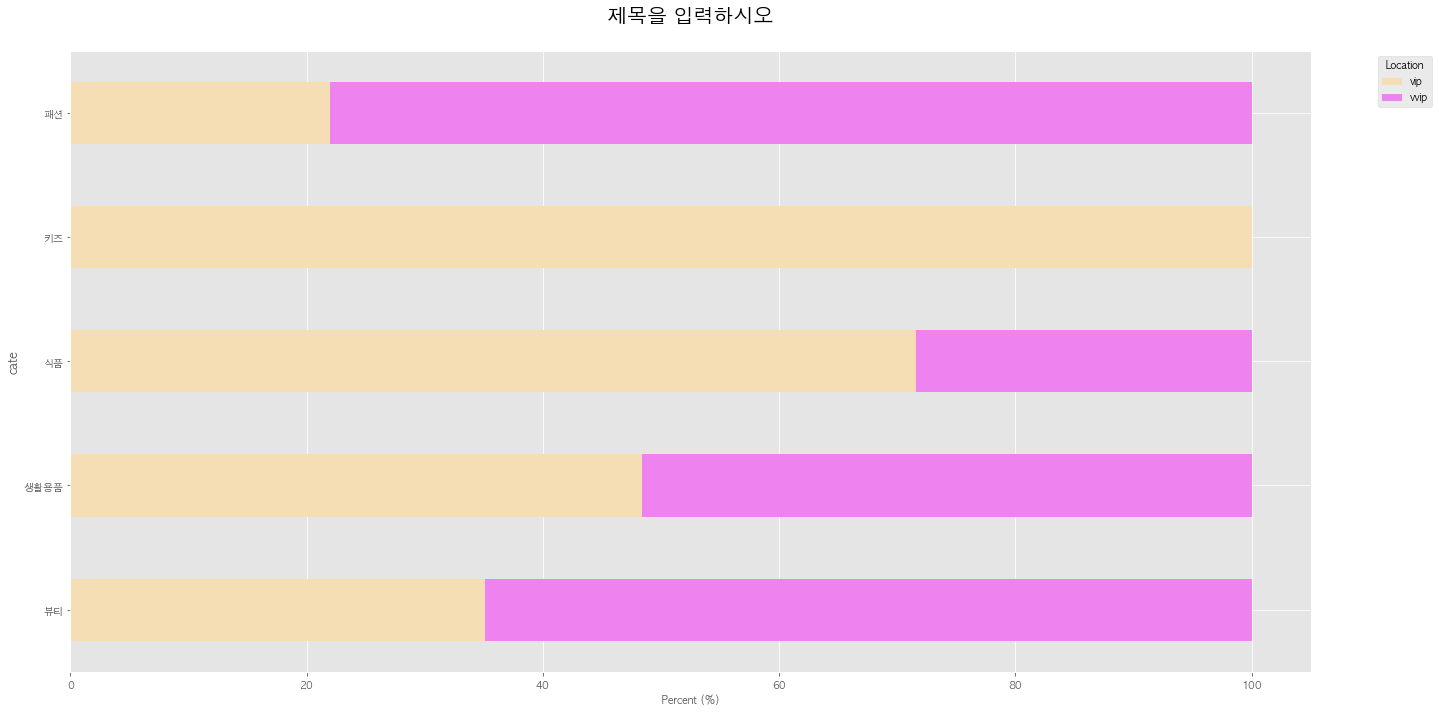

In [16]:
w = pd.pivot_table(grade_cate_df, index = 'cate', columns = 'grade', values = 'pnt(%)').fillna(0)

plt.rcParams["figure.figsize"] = (20,10)

ax = w.plot(stacked=True, color=['wheat',
                                'violet','orchid','purple'], 
            kind = 'barh')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('제목을 입력하시오\n', fontsize = 20)
plt.xlabel('Percent (%)', fontsize = 10)
plt.tight_layout()  
plt.show()